In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [62]:
seDF = pd.read_csv('../data/Sleep_Efficiency.csv', parse_dates=['Bedtime', 'Wakeup time'])
seDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      452 non-null    int64         
 1   Age                     452 non-null    int64         
 2   Gender                  452 non-null    object        
 3   Bedtime                 452 non-null    datetime64[ns]
 4   Wakeup time             452 non-null    datetime64[ns]
 5   Sleep duration          452 non-null    float64       
 6   Sleep efficiency        452 non-null    float64       
 7   REM sleep percentage    452 non-null    int64         
 8   Deep sleep percentage   452 non-null    int64         
 9   Light sleep percentage  452 non-null    int64         
 10  Awakenings              432 non-null    float64       
 11  Caffeine consumption    427 non-null    float64       
 12  Alcohol consumption     438 non-null    float64   

In [63]:
seDF

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [64]:
seDF.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [65]:
print(seDF['Awakenings'].unique())

[ 0.  3.  1.  2.  4. nan]


In [66]:
print(seDF['Caffeine consumption'].unique())

[  0.  50.  nan  25.  75. 200. 100.]


In [67]:
print(seDF['Alcohol consumption'].unique())

[ 0.  3.  5.  1.  2. nan  4.]


In [68]:
print(seDF['Exercise frequency'].unique())

[ 3.  1.  0.  5.  2.  4. nan]


In [69]:
seDF[seDF['Awakenings'].isna()]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
19,20,52,Male,2021-12-03 00:30:00,2021-12-03 07:30:00,7.0,0.89,28,52,20,NaN,50.0,0.0,Yes,3.0
85,86,53,Male,2021-11-06 23:00:00,2021-11-06 06:30:00,7.5,0.88,18,65,17,NaN,75.0,0.0,No,2.0
123,124,19,Male,2021-10-05 01:30:00,2021-10-05 10:00:00,8.5,0.91,20,67,13,NaN,25.0,0.0,Yes,1.0
135,136,48,Female,2021-02-03 00:00:00,2021-02-03 07:00:00,7.0,0.82,20,65,15,NaN,50.0,1.0,No,4.0
138,139,55,Male,2021-03-01 02:30:00,2021-03-01 10:00:00,7.5,0.83,23,58,19,NaN,0.0,3.0,No,3.0
143,144,25,Male,2021-04-21 21:30:00,2021-04-21 04:30:00,7.0,0.87,27,55,18,NaN,0.0,3.0,No,3.0
149,150,33,Female,2021-09-30 02:30:00,2021-09-30 10:00:00,7.5,0.60,24,25,51,NaN,50.0,0.0,No,1.0
170,171,24,Male,2021-10-20 21:30:00,2021-10-20 05:30:00,8.0,0.89,27,55,18,NaN,0.0,3.0,No,3.0
244,245,37,Female,2021-01-08 22:00:00,2021-01-08 05:00:00,7.0,0.92,24,59,17,NaN,0.0,0.0,No,4.0
249,250,61,Male,2021-04-04 00:30:00,2021-04-04 10:30:00,10.0,0.66,19,28,53,NaN,0.0,4.0,No,1.0


In [70]:
seDF['Wakeup time'].sort_values()

131   2021-01-03 08:30:00
416   2021-01-04 05:00:00
429   2021-01-05 06:00:00
287   2021-01-06 05:00:00
351   2021-01-07 07:30:00
              ...        
301   2021-12-29 08:30:00
102   2021-12-30 08:00:00
109   2021-12-30 08:00:00
282   2021-12-31 04:00:00
198   2021-12-31 06:30:00
Name: Wakeup time, Length: 452, dtype: datetime64[ns]

In [71]:
seDF.describe()

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452,452,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,2021-07-13 00:03:39.026548480,2021-07-12 20:19:22.831858176,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
min,1.000000,9.000000,2021-01-03 00:30:00,2021-01-03 08:30:00,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,2021-04-14 01:07:30,2021-04-14 07:52:30,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,2021-07-20 23:30:00,2021-07-20 16:00:00,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,2021-10-11 05:22:30,2021-10-11 05:52:30,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,2021-12-31 21:00:00,2021-12-31 06:30:00,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000
std,130.625419,13.172250,NaN,NaN,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134


In [72]:
seDF.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

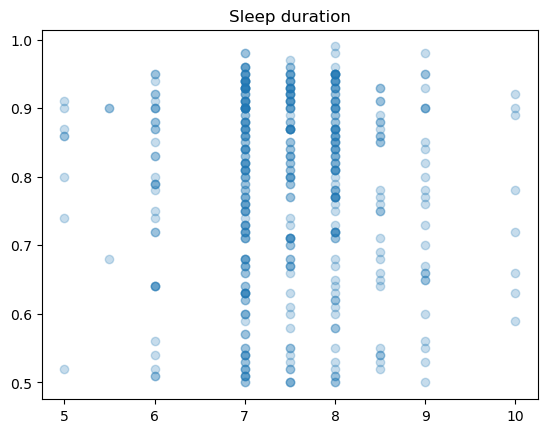

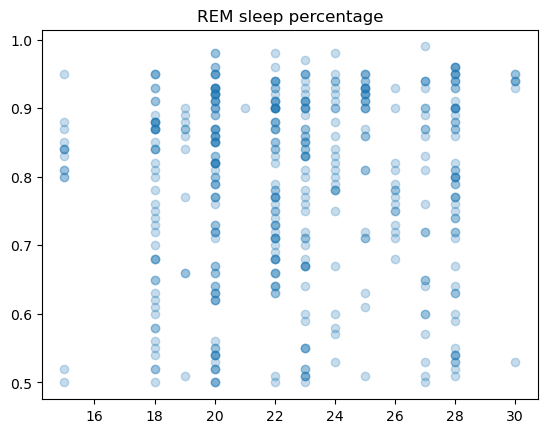

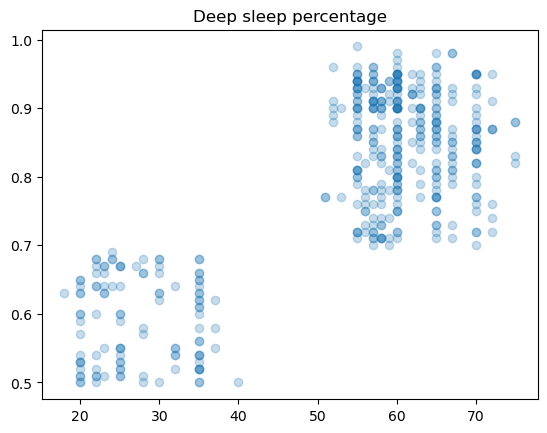

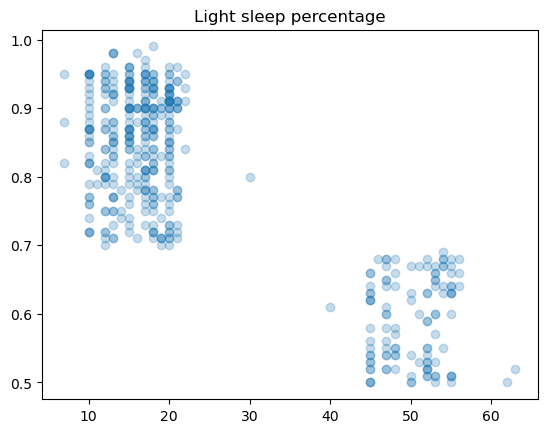

In [106]:
for col in ['Sleep duration', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage']:
    plt.scatter(seDF[col], seDF['Sleep efficiency'], alpha=0.25)
    plt.title(col)
    plt.show()

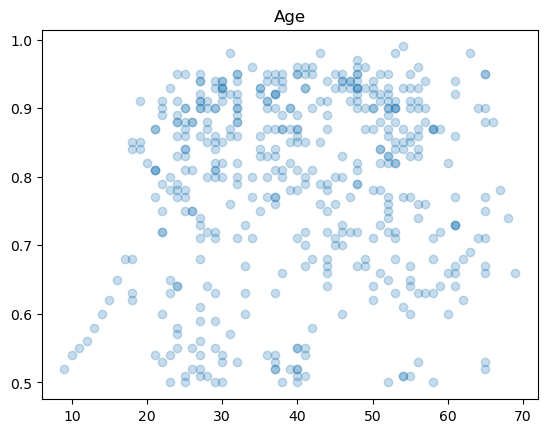

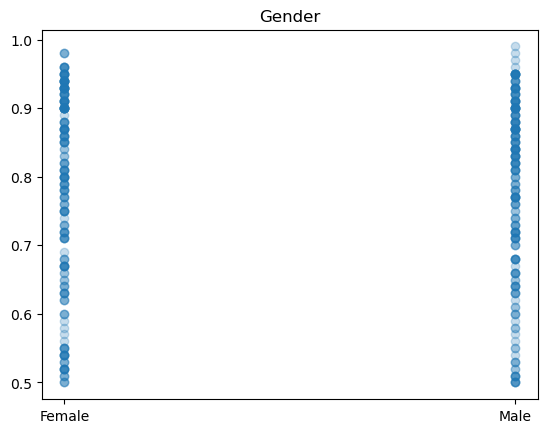

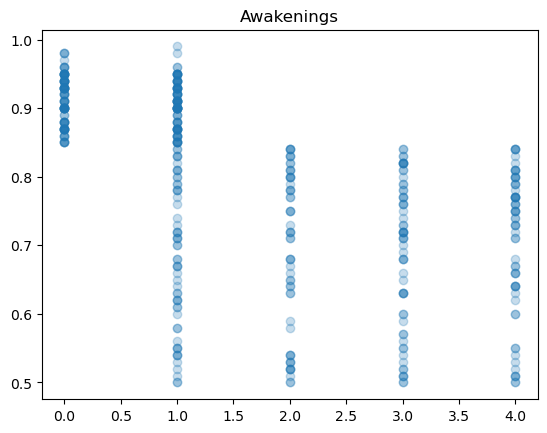

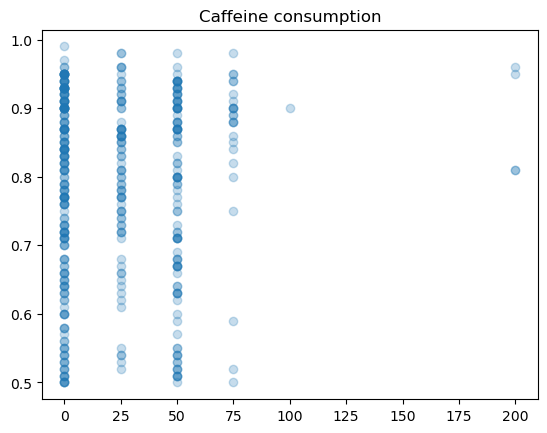

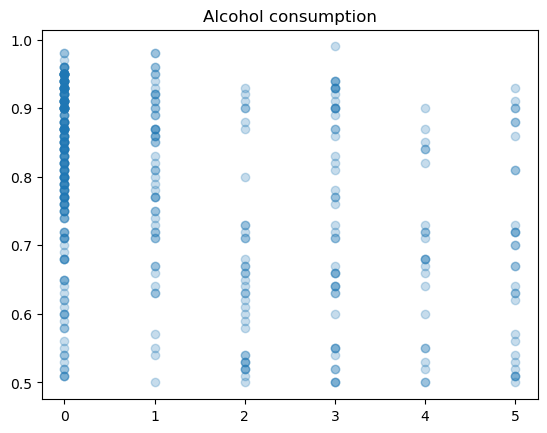

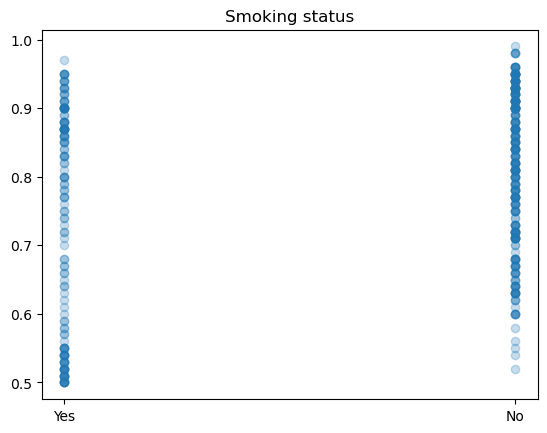

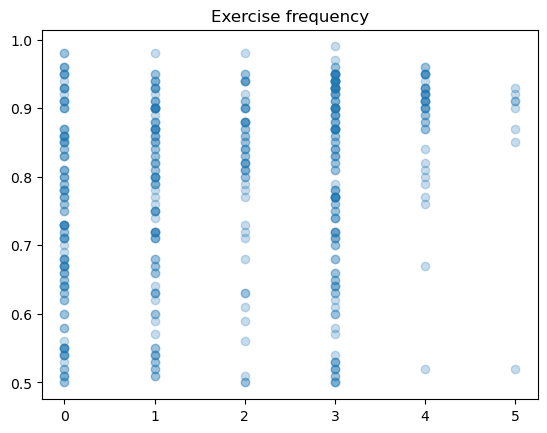

In [107]:
for col in ['Age', 'Gender', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency']:
    plt.scatter(seDF[col], seDF['Sleep efficiency'], alpha=0.25)
    plt.title(col)
    plt.show()

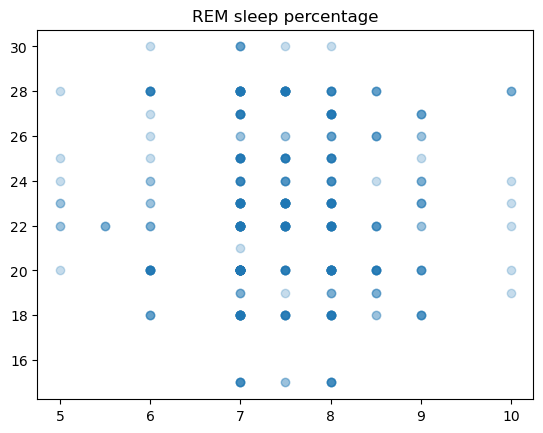

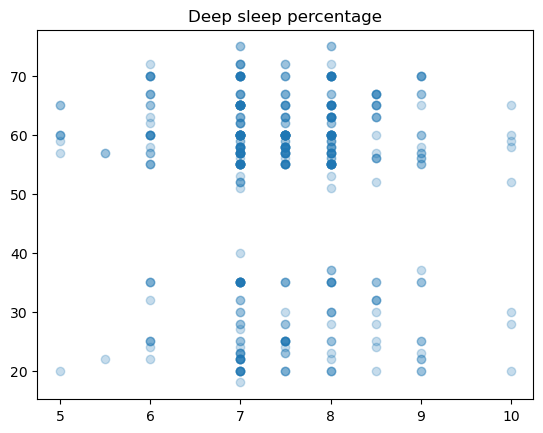

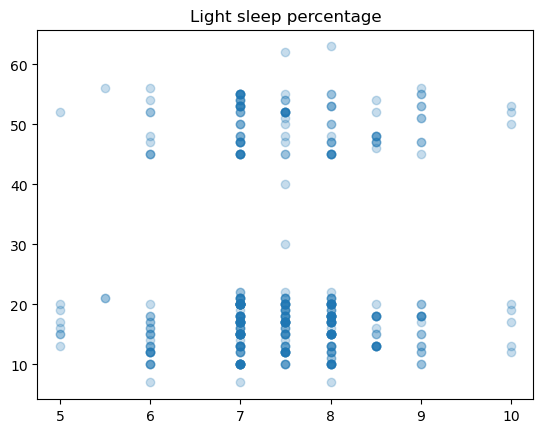

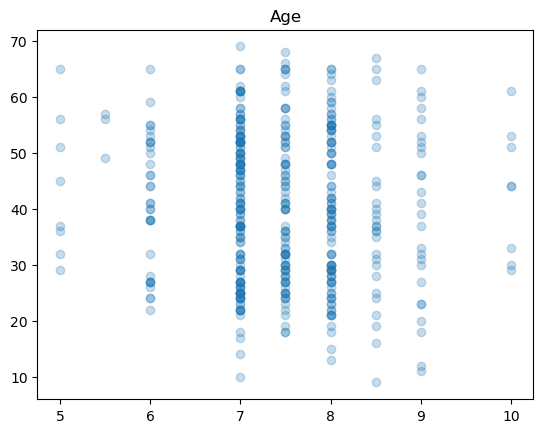

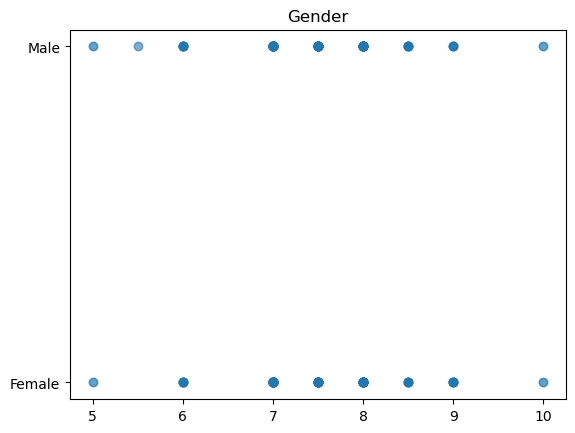

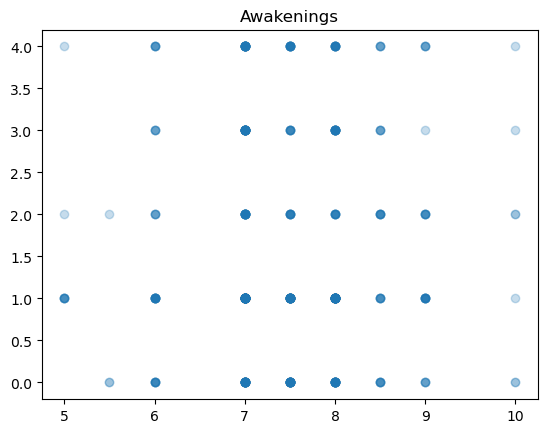

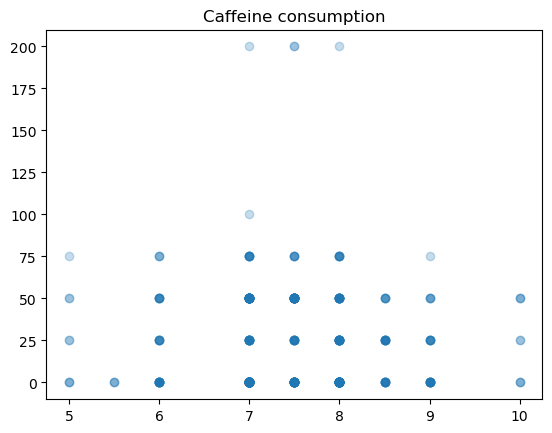

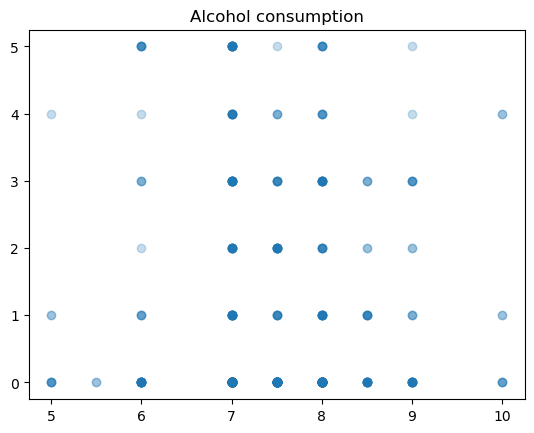

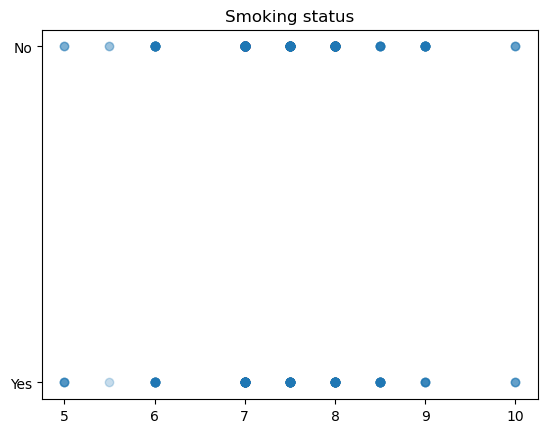

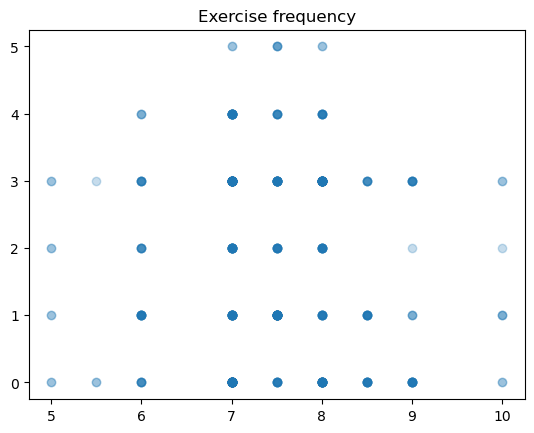

In [108]:
for col in ['REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Age', 'Gender', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency']:
    plt.scatter(seDF['Sleep duration'], seDF[col], alpha=0.25)
    plt.title(col)
    plt.show()

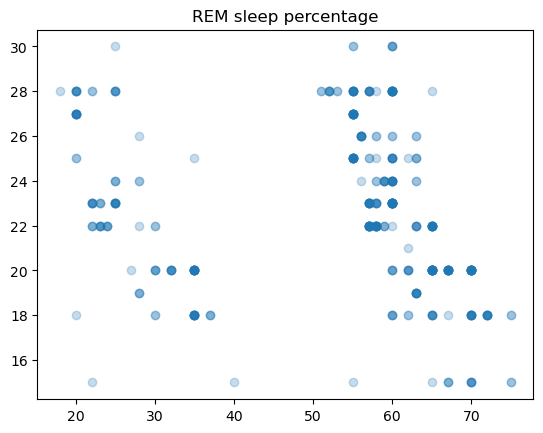

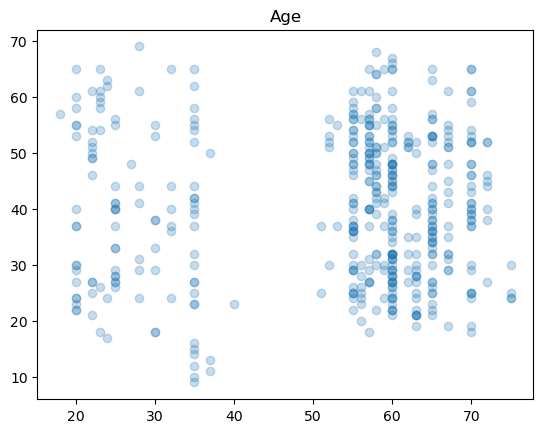

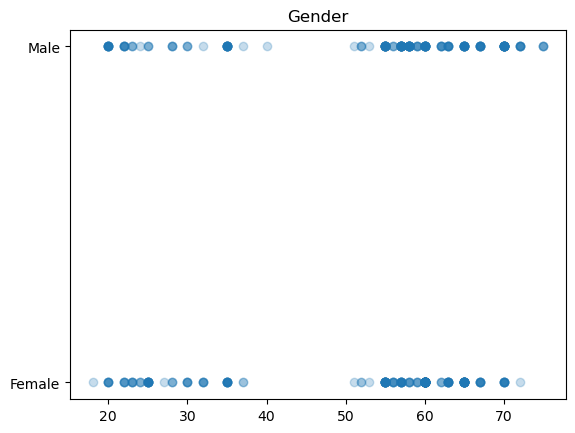

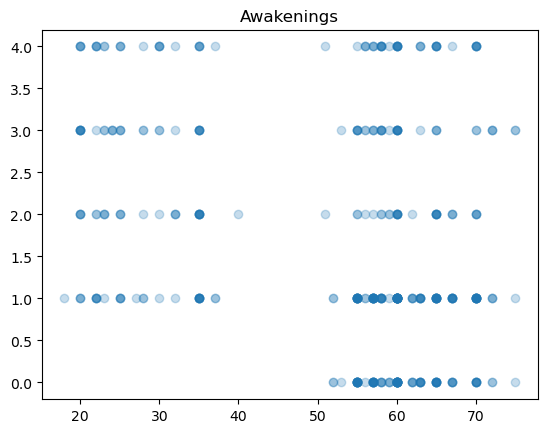

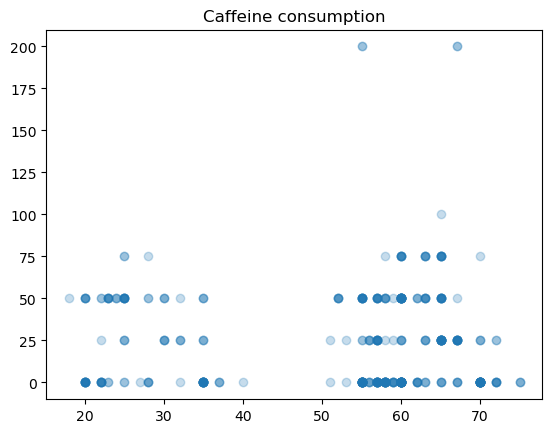

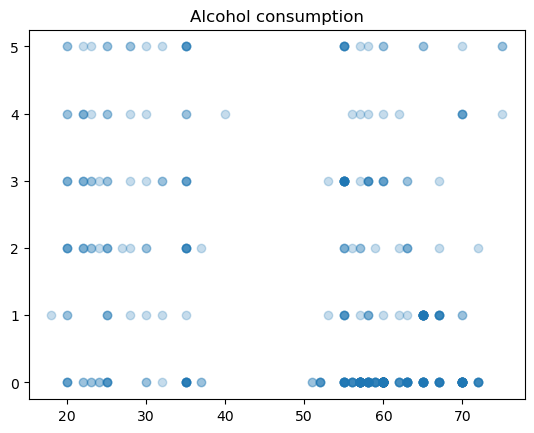

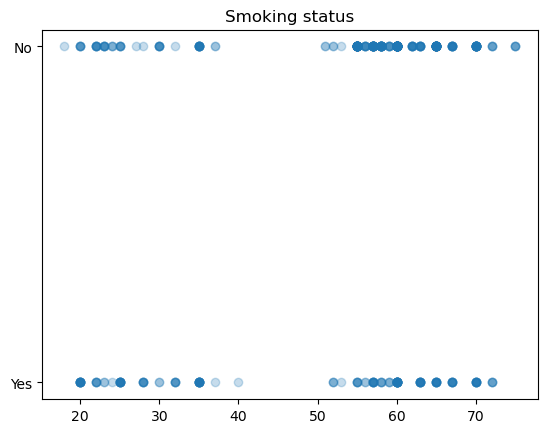

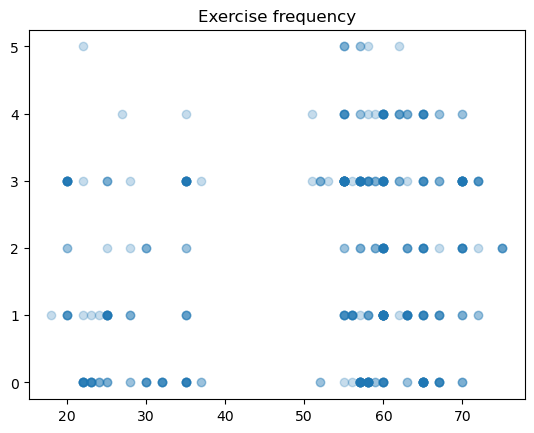

In [109]:
for col in ['REM sleep percentage', 'Age', 'Gender', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency']:
    plt.scatter(seDF['Deep sleep percentage'], seDF[col], alpha=0.25)
    plt.title(col)
    plt.show()

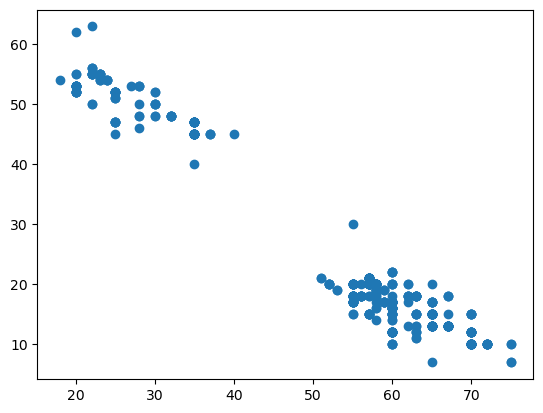

In [77]:
plt.scatter(seDF['Deep sleep percentage'], seDF['Light sleep percentage'])
plt.show()

In [78]:
seDF

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [79]:
seDF['Deep sleep duration'] = seDF['Sleep duration'] * seDF['Deep sleep percentage'] / 100
seDF['Light sleep duration'] = seDF['Sleep duration'] * seDF['Light sleep percentage'] / 100

In [80]:
seDF[['Deep sleep duration', 'Light sleep duration']]

,Deep sleep duration,Light sleep duration
0,4.200,0.720
1,1.960,3.710
2,5.600,0.800
3,1.500,3.120
4,4.400,1.440
...,...,...
447,4.275,1.575
448,3.420,0.900
449,2.720,4.080
450,5.040,0.700


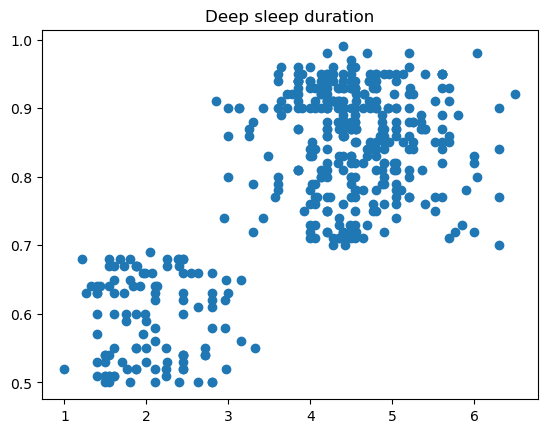

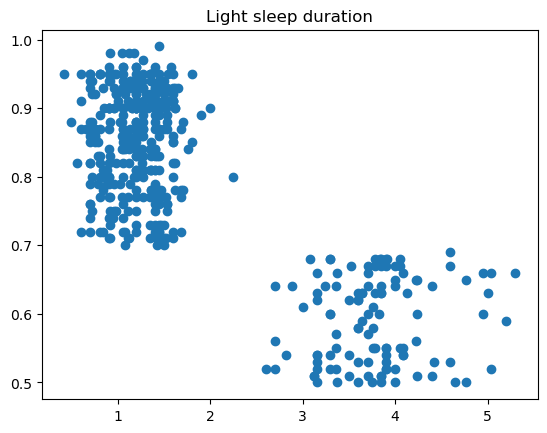

In [81]:
for col in['Deep sleep duration', 'Light sleep duration']:
    plt.scatter(seDF[col], seDF['Sleep efficiency'])
    plt.title(col)
    plt.show()

In [82]:
seDF.corr(numeric_only=True)

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Deep sleep duration,Light sleep duration
ID,1.000000,0.021310,0.014333,-0.025624,0.051636,-0.047300,0.036463,-0.056447,-0.059594,0.115352,0.024640,-0.039840,0.038962
Age,0.021310,1.000000,-0.062462,0.098357,0.042091,0.021730,-0.031905,-0.017789,-0.171460,0.047188,0.072308,-0.008467,-0.038495
Sleep duration,0.014333,-0.062462,1.000000,-0.027467,-0.015940,-0.037304,0.041804,0.004939,-0.014802,-0.046243,-0.068272,0.322766,0.228080
Sleep efficiency,-0.025624,0.098357,-0.027467,1.000000,0.062362,0.787335,-0.819204,-0.564979,0.065082,-0.389624,0.259563,0.728975,-0.795656
REM sleep percentage,0.051636,0.042091,-0.015940,0.062362,1.000000,-0.208159,-0.017462,-0.025332,0.060037,-0.053258,0.031768,-0.199853,-0.020839
Deep sleep percentage,-0.047300,0.021730,-0.037304,0.787335,-0.208159,1.000000,-0.974311,-0.308267,0.001742,-0.361731,0.179102,0.926801,-0.949181
Light sleep percentage,0.036463,-0.031905,0.041804,-0.819204,-0.017462,-0.974311,1.000000,0.321218,-0.015593,0.380571,-0.190191,-0.901397,0.975088
Awakenings,-0.056447,-0.017789,0.004939,-0.564979,-0.025332,-0.308267,0.321218,1.000000,-0.108615,0.206090,-0.219578,-0.285132,0.310419
Caffeine consumption,-0.059594,-0.171460,-0.014802,0.065082,0.060037,0.001742,-0.015593,-0.108615,1.000000,-0.123308,-0.068224,0.000039,-0.020578
Alcohol consumption,0.115352,0.047188,-0.046243,-0.389624,-0.053258,-0.361731,0.380571,0.206090,-0.123308,1.000000,0.006934,-0.343693,0.346486


In [87]:
seDF['Wakeup time'].dt.hour

0       7
1       9
2       5
3       8
4       9
       ..
447     5
448     3
449     7
450     4
451    10
Name: Wakeup time, Length: 452, dtype: int32

In [88]:
seDF['Wakeup time'].dt.hour.unique()

array([ 7,  9,  5,  8,  4,  3, 10,  6, 11, 12])

In [89]:
seDF['Bedtime'].dt.hour.unique()

array([ 1,  2, 21,  0, 22, 23])

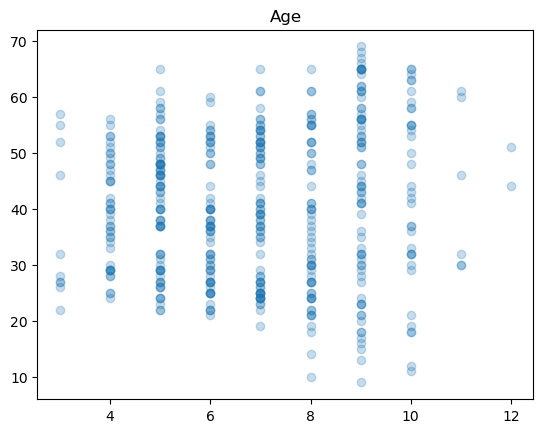

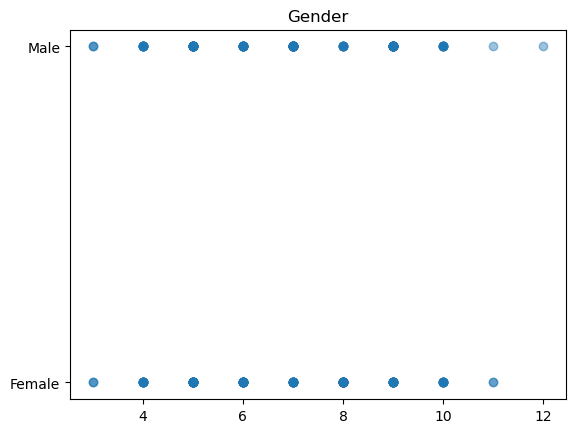

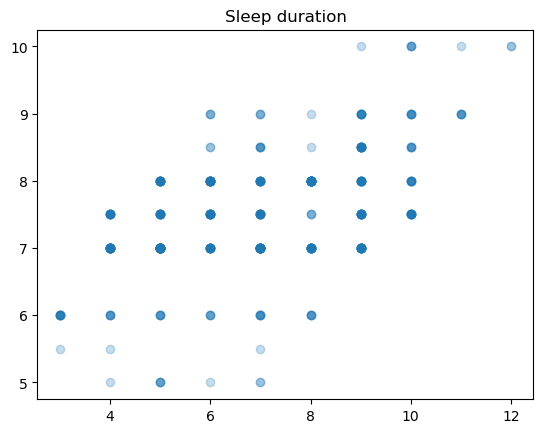

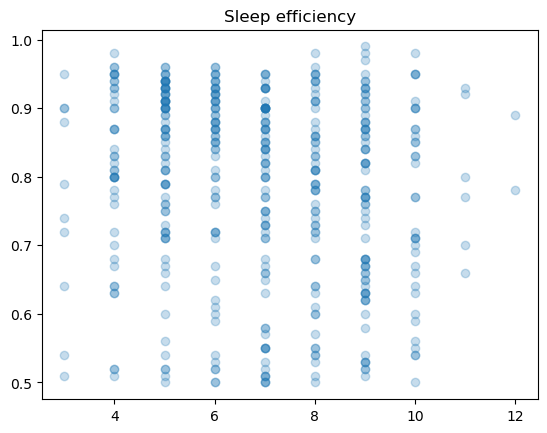

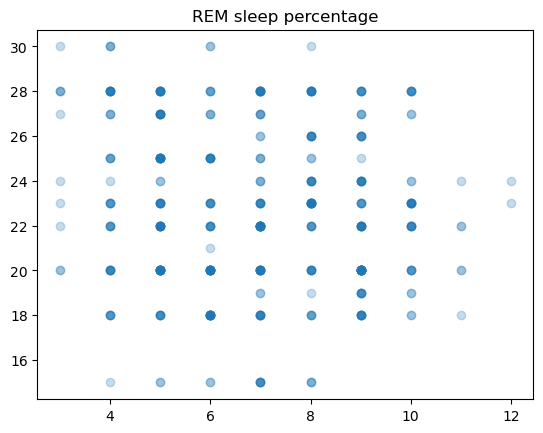

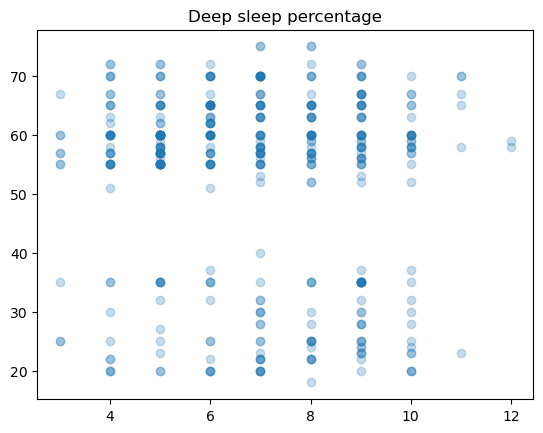

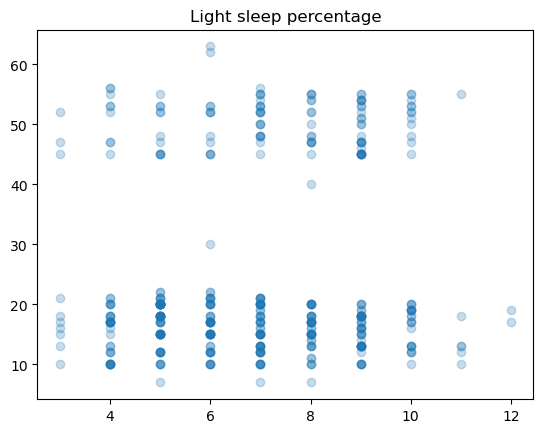

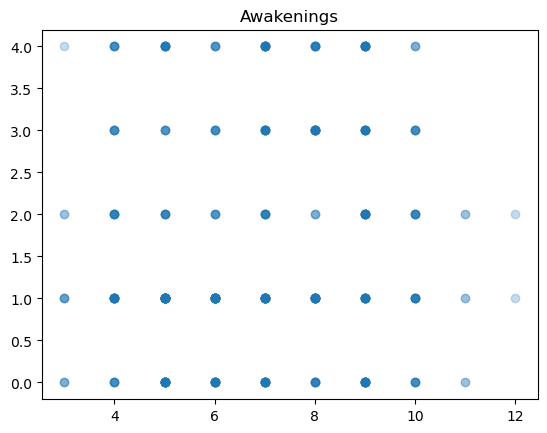

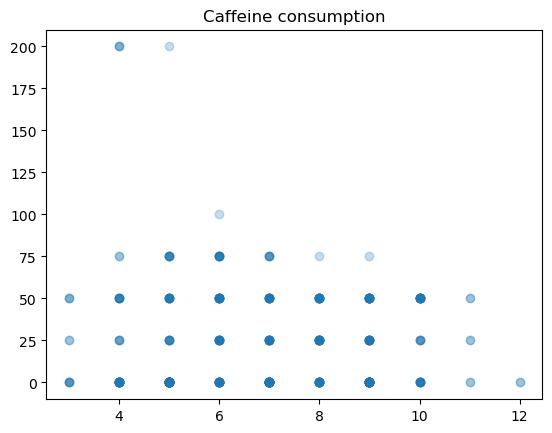

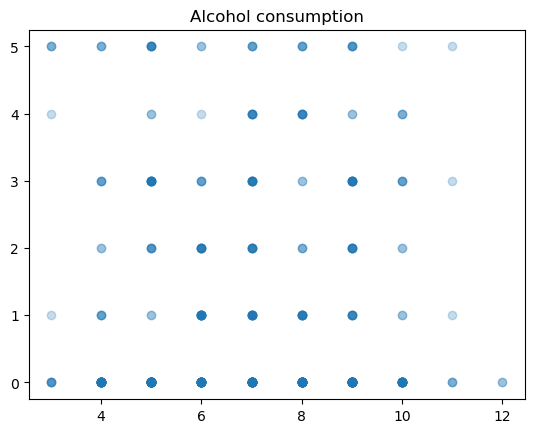

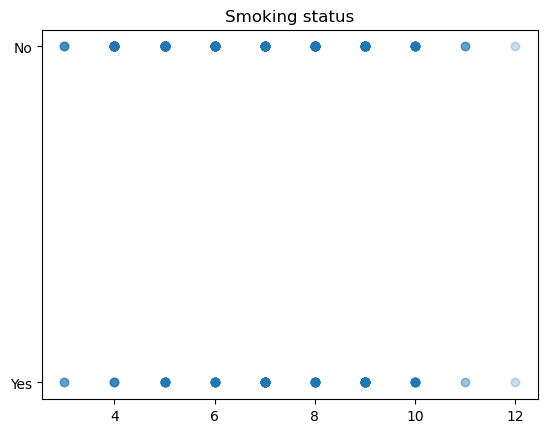

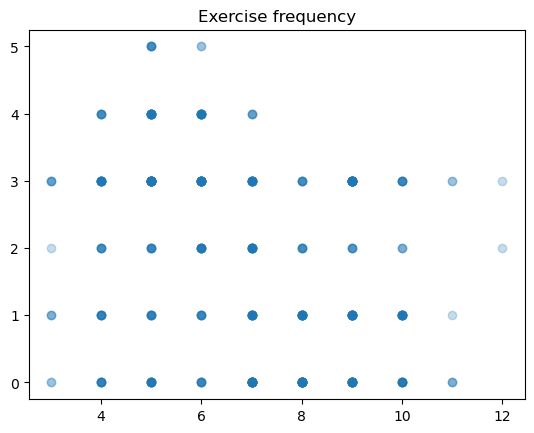

In [110]:
for col in ['Age', 'Gender', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency']:
    plt.scatter(seDF['Wakeup time'].dt.hour, seDF[col], alpha=0.25)
    plt.title(col)
    plt.show()

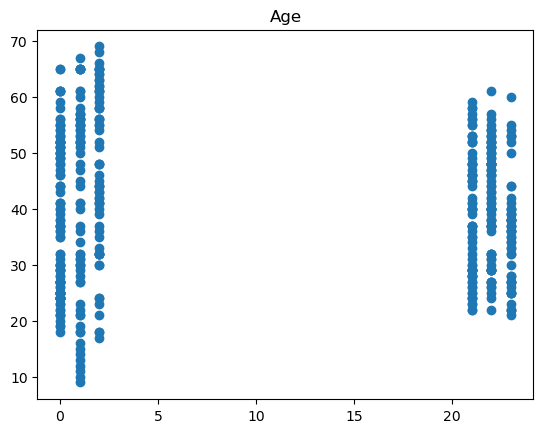

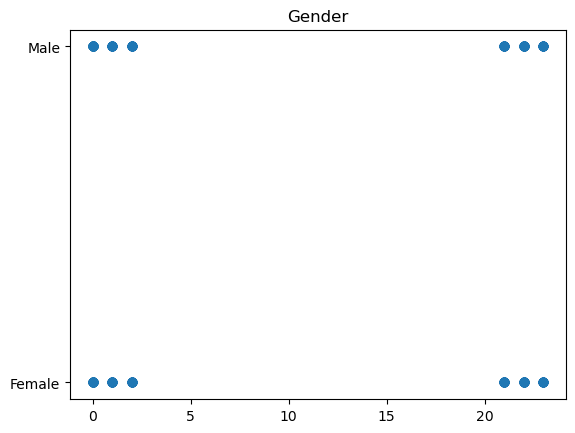

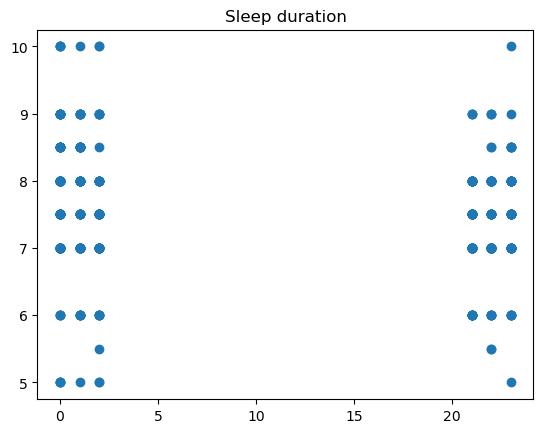

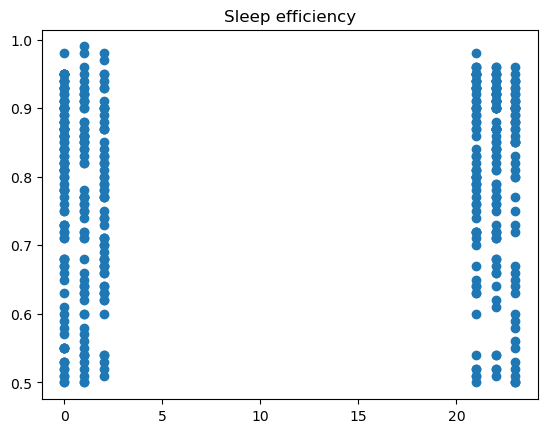

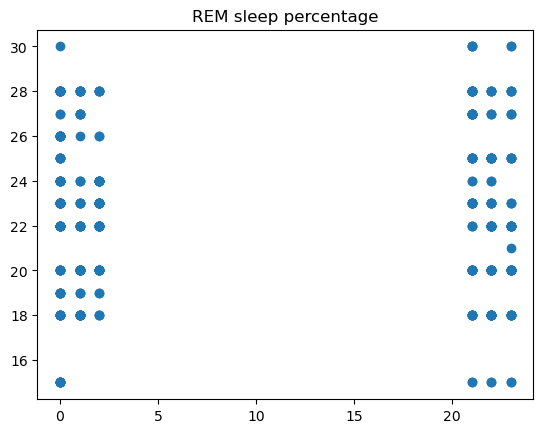

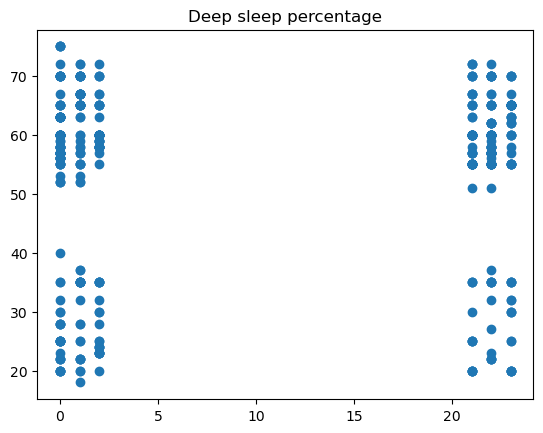

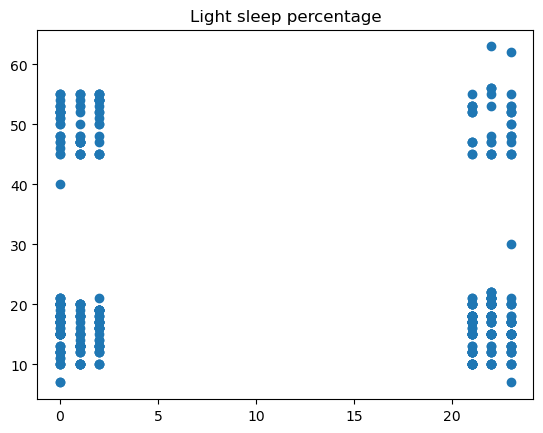

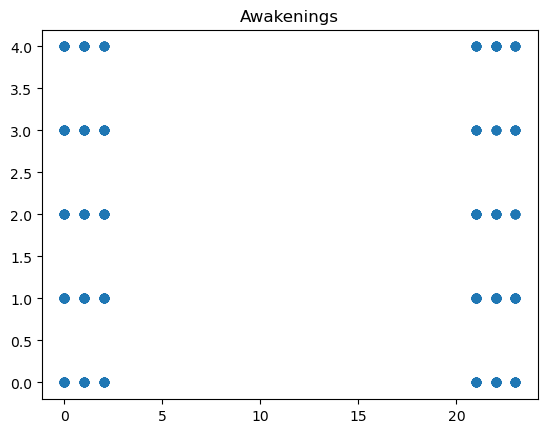

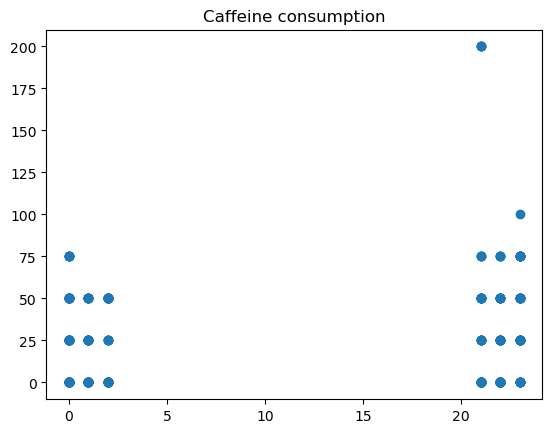

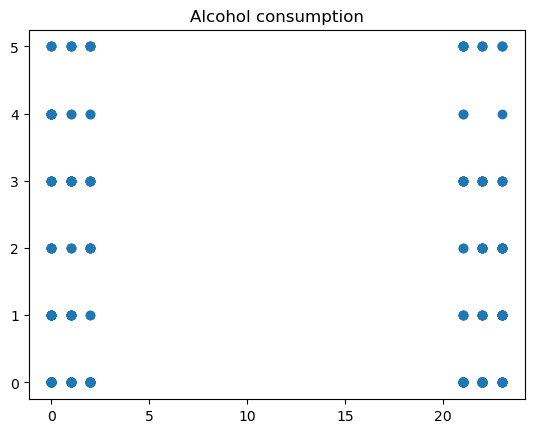

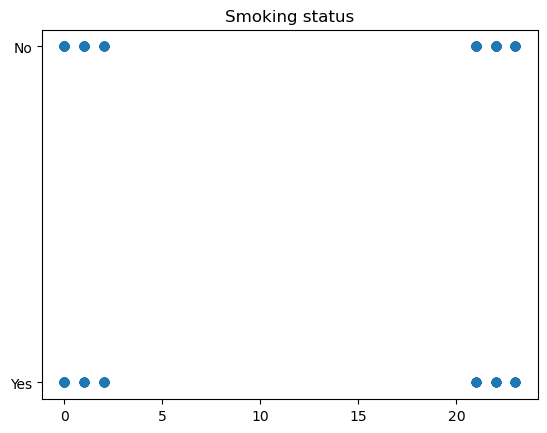

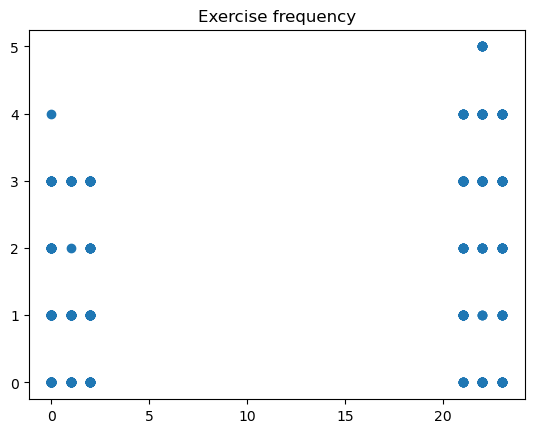

In [92]:
for col in ['Age', 'Gender', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency']:
    plt.scatter(seDF['Bedtime'].dt.hour, seDF[col])
    plt.title(col)
    plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1e4af19cca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e4af19c160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e4af193580>],
 'medians': [<matplotlib.lines.Line2D at 0x1e4af19c790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e4af19c760>],
 'means': []}

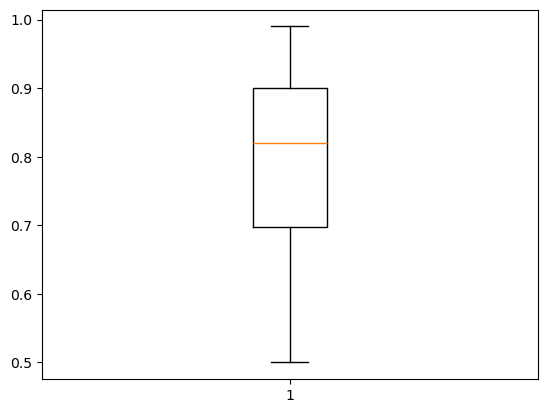

In [94]:
plt.boxplot(seDF['Sleep efficiency'])

In [95]:
seDF.sort_values(by='Sleep efficiency')

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Deep sleep duration,Light sleep duration
272,273,58,Male,2021-02-13 01:00:00,2021-02-13 10:00:00,9.0,0.50,27,20,53,2.0,0.0,3.0,Yes,3.0,1.80,4.77
203,204,38,Male,2021-07-11 23:00:00,2021-07-11 07:00:00,8.0,0.50,20,30,50,3.0,NaN,3.0,Yes,2.0,2.40,4.00
325,326,52,Female,2021-07-30 01:00:00,2021-07-30 08:00:00,7.0,0.50,23,22,55,4.0,0.0,4.0,Yes,0.0,1.54,3.85
446,447,23,Male,2021-04-21 00:00:00,2021-04-21 07:00:00,7.0,0.50,15,40,45,2.0,0.0,4.0,Yes,NaN,2.80,3.15
326,327,29,Female,2021-12-11 00:00:00,2021-12-11 07:30:00,7.5,0.50,22,28,50,1.0,75.0,1.0,Yes,2.0,2.10,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,283,53,Male,2021-12-31 21:00:00,2021-12-31 04:00:00,7.0,0.98,24,60,16,1.0,75.0,0.0,No,2.0,4.20,1.12
206,207,31,Female,2021-01-22 01:30:00,2021-01-22 08:30:00,7.0,0.98,20,67,13,0.0,25.0,1.0,No,0.0,4.69,0.91
18,19,43,Female,2021-07-27 00:00:00,2021-07-27 09:00:00,9.0,0.98,20,67,13,0.0,25.0,1.0,No,0.0,6.03,1.17
23,24,63,Female,2021-05-21 02:30:00,2021-05-21 10:30:00,8.0,0.98,22,65,13,0.0,50.0,0.0,No,1.0,5.20,1.04


In [98]:
seDF['Deep sleep percentage'].median()

58.0

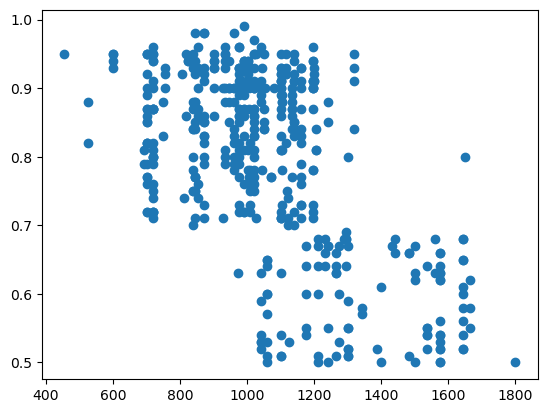

In [100]:
plt.scatter(seDF['Deep sleep percentage']*seDF['Light sleep percentage'], seDF['Sleep efficiency'])
plt.show()

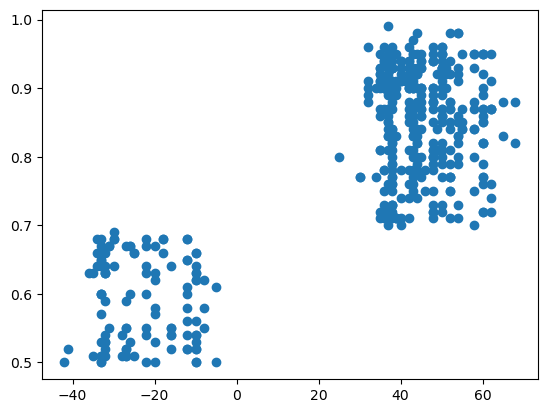

In [101]:
plt.scatter(seDF['Deep sleep percentage']-seDF['Light sleep percentage'], seDF['Sleep efficiency'])
plt.show()

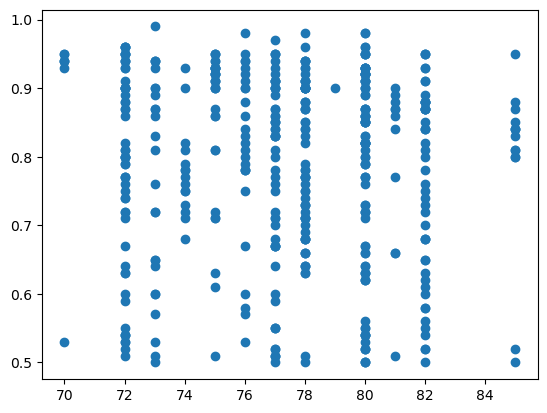

In [102]:
plt.show()
plt.scatter(seDF['Deep sleep percentage']+seDF['Light sleep percentage'], seDF['Sleep efficiency'])
plt.show()

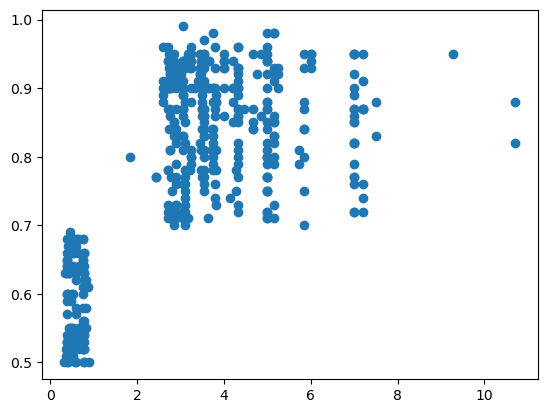

In [103]:
plt.scatter(seDF['Deep sleep percentage']/seDF['Light sleep percentage'], seDF['Sleep efficiency'])
plt.show()

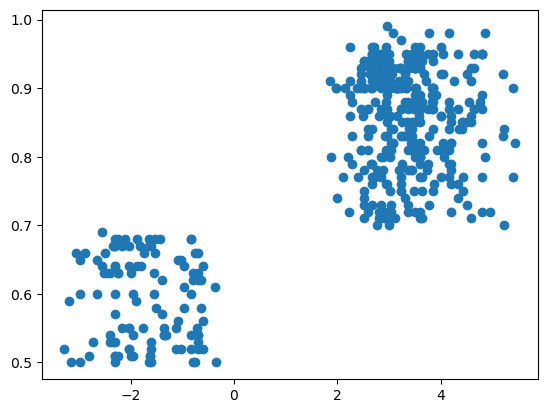

In [104]:
plt.scatter(seDF['Deep sleep duration']-seDF['Light sleep duration'], seDF['Sleep efficiency'])
plt.show()

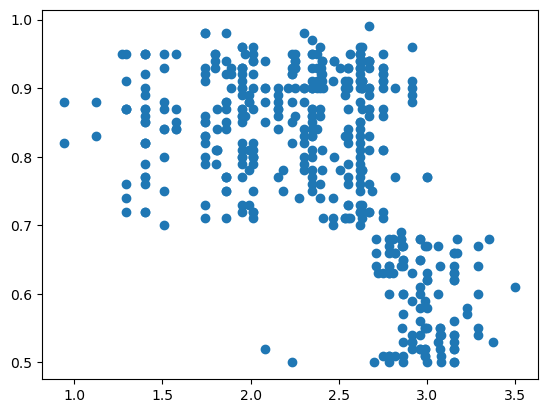

In [140]:
plt.scatter(seDF['Deep sleep percentage']*seDF['Light sleep percentage']*seDF['REM sleep percentage'], seDF['Sleep efficiency'])
plt.show()

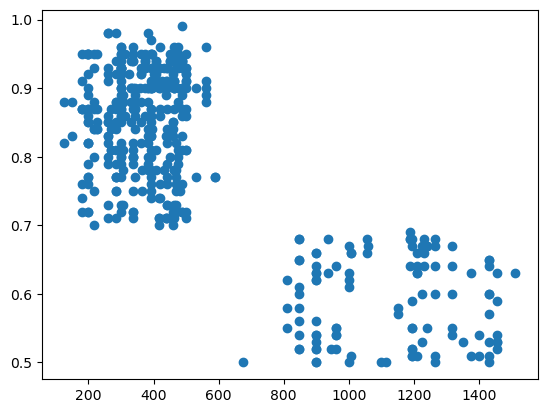

In [112]:
plt.scatter(seDF['Light sleep percentage']*seDF['REM sleep percentage'], seDF['Sleep efficiency'])
plt.show()

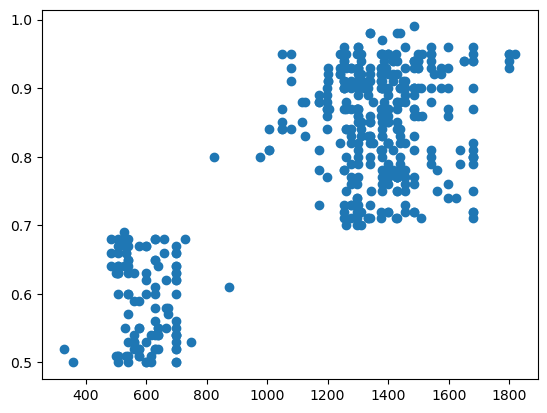

In [113]:
plt.scatter(seDF['Deep sleep percentage']*seDF['REM sleep percentage'], seDF['Sleep efficiency'])
plt.show()

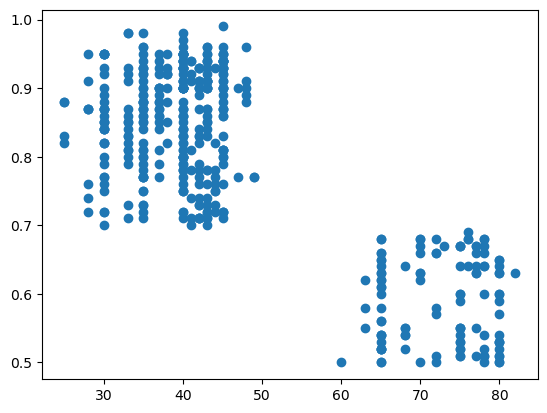

In [114]:
plt.scatter(seDF['Light sleep percentage']+seDF['REM sleep percentage'], seDF['Sleep efficiency'])
plt.show()

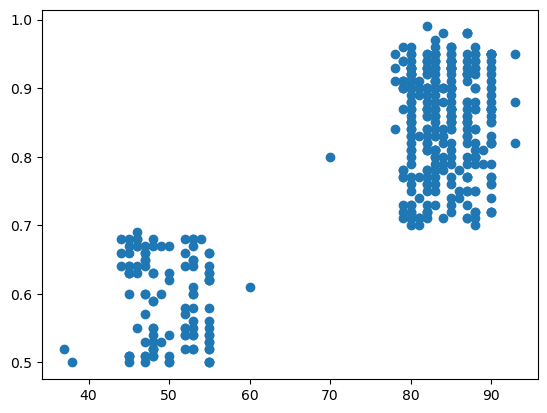

In [115]:
plt.scatter(seDF['Deep sleep percentage']+seDF['REM sleep percentage'], seDF['Sleep efficiency'])
plt.show()

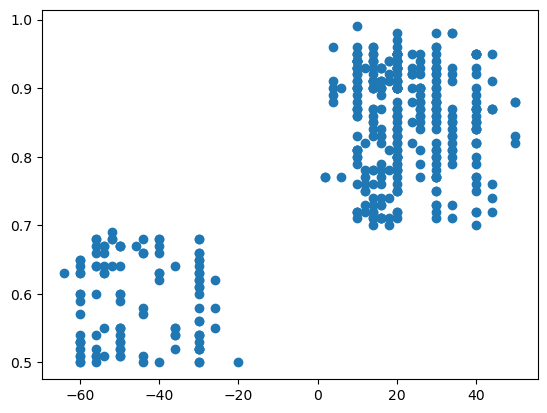

In [117]:
plt.scatter(seDF['Deep sleep percentage']-seDF['REM sleep percentage']-seDF['Light sleep percentage'], seDF['Sleep efficiency'])
plt.show()

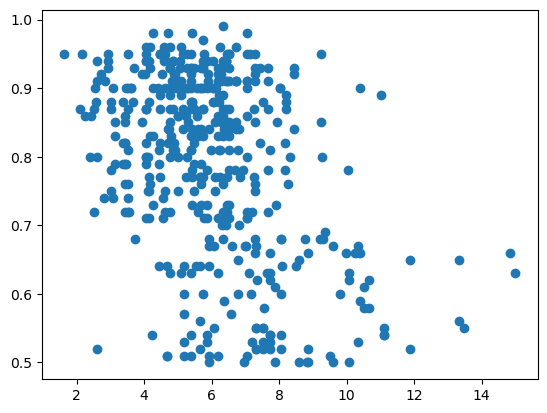

In [135]:
plt.scatter((seDF['Deep sleep duration']*seDF['Light sleep duration']), seDF['Sleep efficiency'])
plt.show()

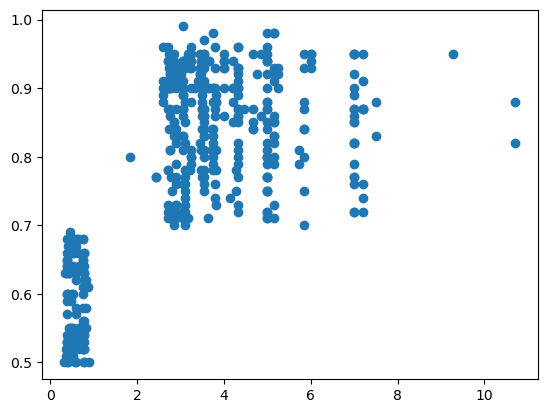

In [136]:
plt.scatter((seDF['Deep sleep duration']/seDF['Light sleep duration']), seDF['Sleep efficiency'])
plt.show()

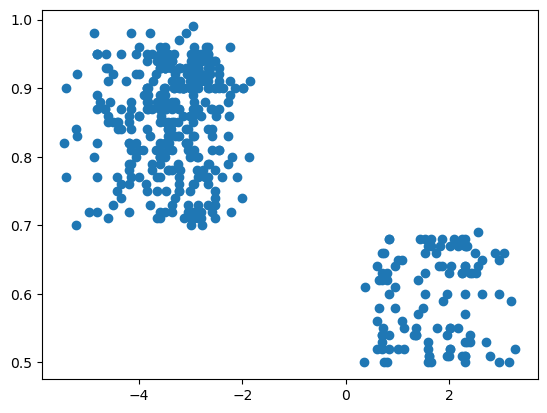

In [138]:
plt.scatter((seDF['Light sleep duration']-seDF['Deep sleep duration']), seDF['Sleep efficiency'])
plt.show()

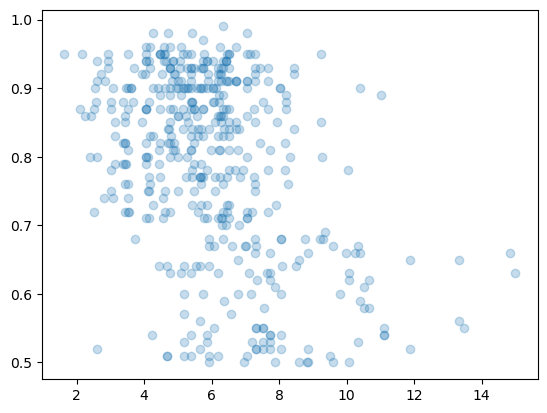

In [164]:
plt.scatter(((seDF['Deep sleep duration']*seDF['Light sleep duration'])), seDF['Sleep efficiency'], alpha=0.25)
plt.show()

In [179]:
rate1 = seDF['Deep sleep duration'] / (seDF['Deep sleep duration'] + seDF['Light sleep duration']) * 100
rate2 = seDF['Light sleep duration'] / (seDF['Deep sleep duration'] + seDF['Light sleep duration']) * 100

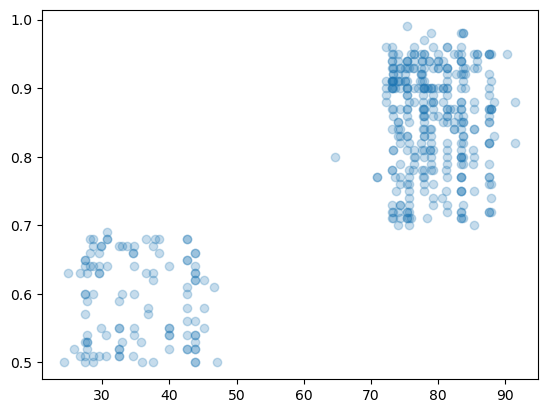

In [181]:
plt.scatter(rate1, seDF['Sleep efficiency'], alpha=0.25)
plt.show()

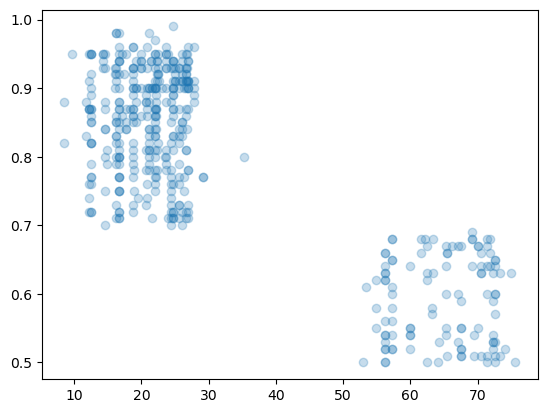

In [182]:
plt.scatter(rate2, seDF['Sleep efficiency'], alpha=0.25)
plt.show()

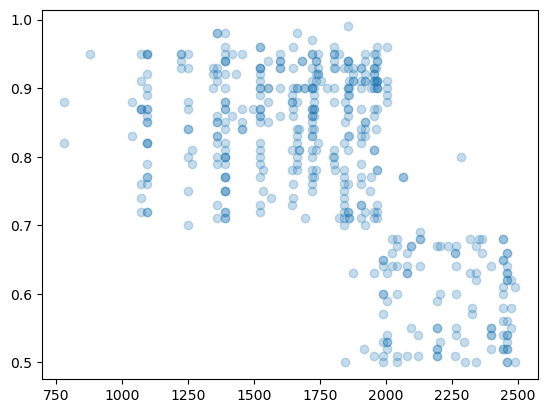

In [183]:
plt.scatter(rate1*rate2, seDF['Sleep efficiency'], alpha=0.25)
plt.show()

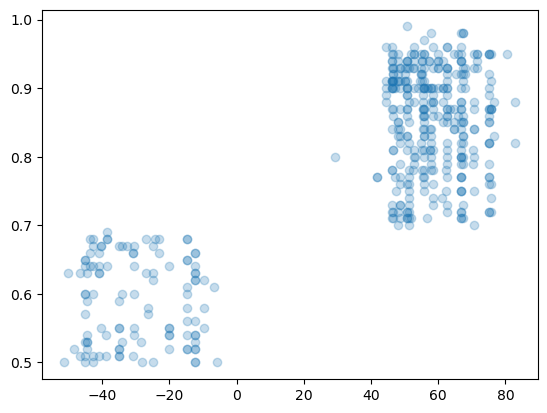

In [184]:
plt.scatter(rate1-rate2, seDF['Sleep efficiency'], alpha=0.25)
plt.show()